In [1]:
import sys
sys.path.append("../")
from KS import KS
import numpy as np
from scipy.integrate import odeint, simpson
import h5py
from importlib import reload
from matplotlib import pyplot as plt
from numpy.linalg import norm
from pathlib import Path
from sklearn.decomposition import PCA 
import seaborn as sns
color_palette = sns.color_palette("colorblind")
%matplotlib inline

In [2]:
ks = KS(L=22.0, K=15, dt=0.01)

In [3]:
pos_path = Path("../data/5POs_L22.000.hdf5")

fpos = h5py.File(pos_path, 'r')
pos = {}

for ipo, po in enumerate(fpos.keys()):

    pos[po] = {}
    for key in fpos[po].keys():
        pos[po][key] = fpos[po][key][()]

fpos.close()

In [4]:
%matplotlib inline

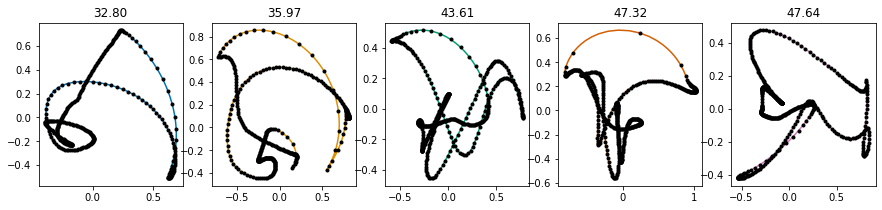

In [5]:
num_pos = len(pos)
fig, axes = plt.subplots(1, num_pos, figsize=(num_pos * 3, 3))

for ipo, po in enumerate(pos):

    xi_p = pos[po]['xi_p']
    T_p = pos[po]['T_p']

    tt = np.arange(0, T_p, ks.dt)
    sol_po = odeint(ks.rhs, xi_p, tt)
    sol_po_ = ks.symmreduce(sol_po)
    pca = PCA(n_components=3).fit(sol_po_)
    po_pca = pca.transform(sol_po_)
    pos[po]['sol_po'] = sol_po
    pos[po]['sol_po_'] = sol_po_

    pos[po]['pca'] = pca
    pos[po]['po_pca'] = po_pca
    axes[ipo].plot(po_pca[:, 0], po_pca[:, 1], color=color_palette[ipo])
    axes[ipo].plot(po_pca[::10, 0], po_pca[::10, 1], 'k.')

    axes[ipo].set_title(f"{T_p:2.2f}")

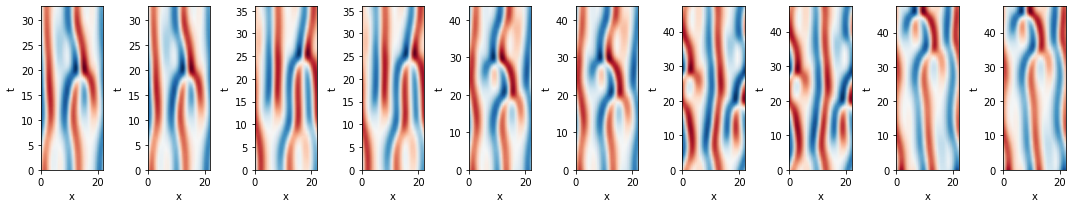

In [8]:
fig, axes = plt.subplots(1, 2 * num_pos, figsize=(num_pos * 3, 3))

for ipo, po in enumerate(pos):

    tt = np.arange(0, pos[po]['T_p'], ks.dt)
    ks.plot_spacetime(pos[po]['sol_po'], tt, ax=axes[2 * ipo])

    rec_sol_po = ks.reconst_sol(pos[po]['sol_po_'], xi_0=pos[po]['sol_po'][0, :], tt=tt, verbose=False)
    im, _, _ = ks.plot_spacetime(rec_sol_po, tt, ax=axes[2 * ipo + 1])

#     cbar = plt.colorbar(im, axes[ipo])
fig.tight_layout()

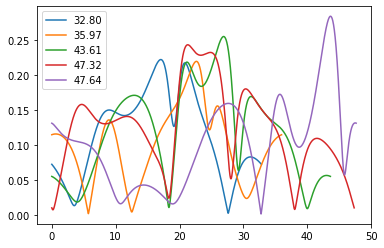

In [7]:
# fig, axes = plt.subplots(1, 2 * num_pos, figsize=(num_pos * 3, 3))

for ipo, po in enumerate(pos):

    tt = np.arange(0, pos[po]['T_p'], ks.dt)
    sol_po = pos[po]['sol_po']
    norm_plot = np.sqrt(sol_po[:, 8] ** 2 + sol_po[:, 9] ** 2)
    plt.plot(tt, norm_plot, label=po)

plt.legend()

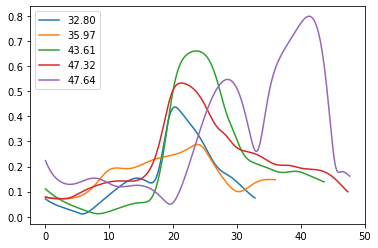

In [8]:
for ipo, po in enumerate(pos):

    tt = np.arange(0, pos[po]['T_p'], ks.dt)
    sol_po = pos[po]['sol_po']
    norm_first = np.sqrt(sol_po[:, 1] ** 2 + sol_po[:, 5] ** 2)
    plt.plot(tt, norm_first, label=po)

plt.legend()

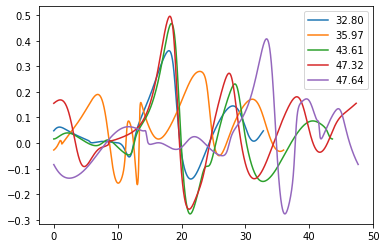

In [9]:
for ipo, po in enumerate(pos):

    tt = np.arange(0, pos[po]['T_p'], ks.dt)
    sol_po_ = pos[po]['sol_po_']
    plt.plot(tt, sol_po_[:, 17], label=po)

# plt.xlim(8, 10)
plt.legend()